In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist=tf.keras.datasets.mnist

mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


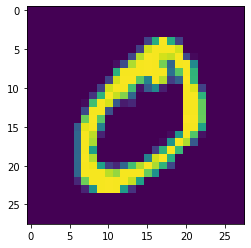

In [4]:
plt.imshow(x_train[1])

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(tf.keras.layers.Dense(128,activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

y_train[0]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 101,880
Trainable params: 101,880
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [34]:
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 1.1956 - acc: 0.5053
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 1.1956 - acc: 0.4960
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 1.1140 - acc: 0.5382
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 1.1850 - acc: 0.5221
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 1.1612 - acc: 0.5361


In [0]:
predict=model.predict(np.expand_dims(x_test[1,:,:],0))

In [15]:
predict

array([[0.23045637, 0.00533228, 0.20643605, 0.17203225, 0.00978426,
        0.09941477, 0.21501096, 0.00353851, 0.05176655, 0.00622795]],
      dtype=float32)

In [16]:
np.argmax(predict)

0

In [37]:
from google.colab import files
uploaded = files.upload()

Saving imgg.png to imgg.png


In [0]:
import skimage.io as skio
import os
from skimage.color import rgb2gray
from skimage.transform import resize

In [39]:
!ls

imgg.png  img.jpg  sample_data


In [0]:
digit = skio.imread("./imgg.png")

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


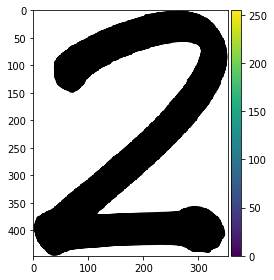

In [49]:
skio.imshow(digit)

In [0]:
gray = rgb2gray(digit)

In [50]:
digit.shape

(447, 354, 4)

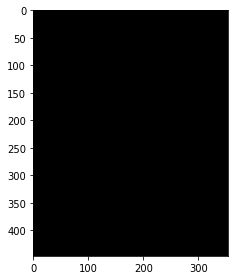

In [48]:
skio.imshow(gray)

In [0]:
gray = resize(gray, (28,28), anti_aliasing=True)

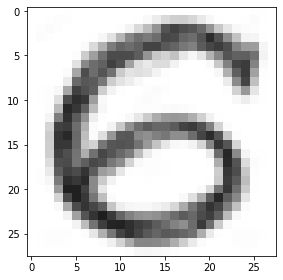

In [28]:
skio.imshow(gray)

In [0]:
predict = model.predict(np.expand_dims(gray,0))

In [36]:
np.argmax(predict)

0